# Homeworks 4 and 5

This homework will practice several tools that we cover over the past 2 weeks. We will practice handling geopandas, plotting these data on maps, reading/writing in netcdf, and spectral analysis of spatial and temporal data.

Make sure you started your notebook with the ``uwdsgeo`` environment.

**1. Terrestrial Glacier data base** (15 points):

practice geopandas, practice plotting on maps, practice measuring means and correlations, linear regressions.

**2. Ice-shelf seismograms** (15 points)

Time-domain filtering, 1D Fourier transform.

**3. 2D Crustal model** (10 points)

practice reading netcdf, making maps and exploring 2D spectral content.


## 1. Terrestrial Glaciers 

We will look at ice thickness of global glaciers from Welty et al, 2021:\
Welty, E., Zemp, M., Navarro, F., Huss, M., Fürst, J.J., Gärtner-Roer, I., Landmann, J., Machguth, H., Naegeli, K., Andreassen, L.M. and Farinotti, D., 2020. Worldwide version-controlled database of glacier thickness observations. Earth System Science Data, 12(4), pp.3039-3055. https://doi.org/10.5194/essd-12-3039-2020

### a) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy

In [6]:
# solution
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np

### b) Import data (2 points)
Read the glacier data from the file ``glathida/data/T.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [7]:
# solution
data = pd.read_csv('glathida/data/T.csv')
data.head()

,GlaThiDa_ID,POLITICAL_UNIT,GLACIER_NAME,GLACIER_DB,GLACIER_ID,LAT,LON,SURVEY_DATE,ELEVATION_DATE,AREA,...,SURVEY_METHOD_DETAILS,NUMBER_OF_SURVEY_POINTS,NUMBER_OF_SURVEY_PROFILES,TOTAL_LENGTH_OF_SURVEY_PROFILES,INTERPOLATION_METHOD,INVESTIGATOR,SPONSORING_AGENCY,REFERENCES,DATA_FLAG,REMARKS
0,1,SE,ISFALLSGLAC,WGI,SE4B000E0006,67.91500,18.56800,19790399.0,19799999.0,1.3,...,NaN,NaN,NaN,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN
1,2,SE,RABOTS GLACIAER,WGI,SE4B000E1016,67.91000,18.49600,19790399.0,19799999.0,4.1,...,NaN,NaN,10.0,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN
2,3,SE,STORGLACIAEREN,WGI,SE4B000E0005,67.90000,18.57000,19790399.0,19799999.0,3.1,...,NaN,NaN,NaN,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN
3,4,US,SOUTH CASCADE,WGI,US2M00264006,48.35698,-121.05735,19759999.0,19759999.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Driedger, C.L., and Kennard, P.M., (1986a). An...",NaN,NaN
4,5,CA,ATHABASCA,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Driedger, C.L., and Kennard, P.M., (1986a). An...",NaN,NaN


### c) Convert Pandas to Geopandas (1 point)
You can create a Geopandas GeoDataFrame from a Pandas DataFrame if there is coordinate data in the DataFrame. In the data that you opened above, there are columns for the ``X`` (or longitude) and ``Y`` (or latitude) coordinates of each rock formation - with headers named ``X`` (or here LON) and ``Y`` (or LAT).

You can convert columns containing x,y coordinate data using the GeoPandas ``points_from_xy()`` function as follows:

``coordinates = gpd.points_from_xy(column-with-x-data.X, column-with-y-data.Y)``

Describe the new geopandas.

In [8]:
# solution
coordinates = gpd.points_from_xy(data.LON, data.LAT)
geodata = gpd.GeoDataFrame(data, geometry=coordinates)
geodata.head()

,GlaThiDa_ID,POLITICAL_UNIT,GLACIER_NAME,GLACIER_DB,GLACIER_ID,LAT,LON,SURVEY_DATE,ELEVATION_DATE,AREA,...,NUMBER_OF_SURVEY_POINTS,NUMBER_OF_SURVEY_PROFILES,TOTAL_LENGTH_OF_SURVEY_PROFILES,INTERPOLATION_METHOD,INVESTIGATOR,SPONSORING_AGENCY,REFERENCES,DATA_FLAG,REMARKS,geometry
0,1,SE,ISFALLSGLAC,WGI,SE4B000E0006,67.91500,18.56800,19790399.0,19799999.0,1.3,...,NaN,NaN,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN,POINT (18.56800 67.91500)
1,2,SE,RABOTS GLACIAER,WGI,SE4B000E1016,67.91000,18.49600,19790399.0,19799999.0,4.1,...,NaN,10.0,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN,POINT (18.49600 67.91000)
2,3,SE,STORGLACIAEREN,WGI,SE4B000E0005,67.90000,18.57000,19790399.0,19799999.0,3.1,...,NaN,NaN,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN,POINT (18.57000 67.90000)
3,4,US,SOUTH CASCADE,WGI,US2M00264006,48.35698,-121.05735,19759999.0,19759999.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Driedger, C.L., and Kennard, P.M., (1986a). An...",NaN,NaN,POINT (-121.05735 48.35698)
4,5,CA,ATHABASCA,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,"Driedger, C.L., and Kennard, P.M., (1986a). An...",NaN,NaN,POINT (-117.28400 52.17540)


### d) Mapping geopandas points (3 points)

Import a nice background elevation map using a rasterIO image. Use the tutorial instructions and download the file from;
https://www.naturalearthdata.com/downloads/50m-raster-data/50m-cross-blend-hypso/


In [9]:
# solution
elevation = rasterio.open("HYP_50M_SR.tif")

___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [10]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [11]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

Then we will use ``pix`` as the first layer of the plot. Because ``pix`` only contains pixel dimension, you can add the physical dimension using the argument ``extent=bounds`` in your first plot.
Then add the Geopandas points using the geopandas ``plot()`` function and customize the marker size, style, and color using your artistic talents. Please anotate the figure with x and y labels, a title, and save the figure into a PNG. The figure should be saved into an 11x8 inch plot, and fontsize should be at least 14 points. You can set your default values for all of your plots using the ``rc.Params.update`` parameters we tested in the week3_lab1 tutorial.

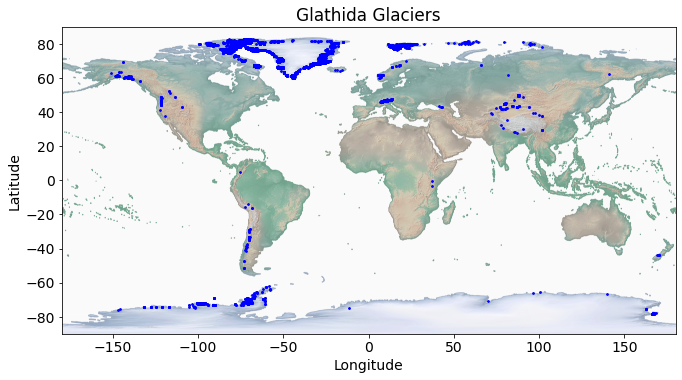

In [12]:
# solution
params = {'legend.fontsize': 14, \
          'xtick.labelsize':14, \
          'ytick.labelsize':14, \
          'font.size':14}
plt.rcParams.update(params)

fig,ax = plt.subplots(figsize=(11,8))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glathida Glaciers')
geodata.plot(ax=ax,color='blue',markersize=3)
plt.imshow(pix,extent=bounds)
plt.savefig('HW_4_5_Glaciers.png')

### e) Explore the data with vizualisation (3 points)
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``MEAN_THICKNESS``, ``AREA``, ``MEAN_SLOPE`` parameters.

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope


In [13]:
new_geodata=geodata.dropna(subset=['MEAN_THICKNESS','AREA','MEAN_SLOPE'])

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

__Tips__: 
1. Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
2. use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
3. Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with units. ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

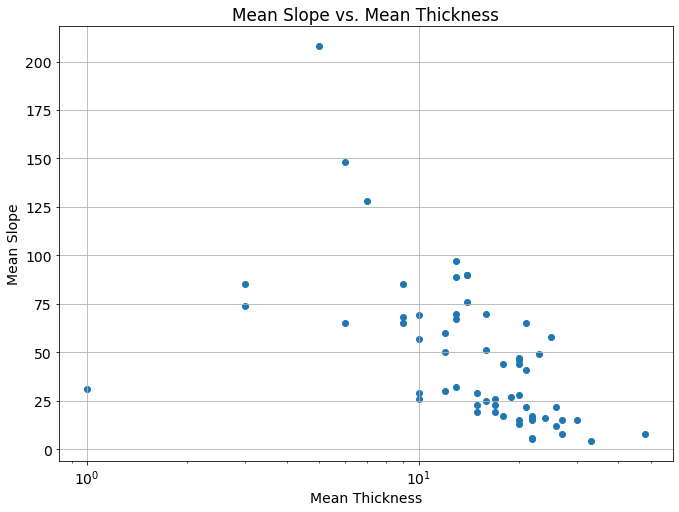

In [14]:
# Figure 1: Mean slope vs mean thickness
# solution
plt.figure(figsize=(11,8))
plt.scatter(new_geodata["MEAN_SLOPE"], new_geodata["MEAN_THICKNESS"])
plt.xlabel('Mean Thickness')
plt.ylabel('Mean Slope')
plt.title('Mean Slope vs. Mean Thickness')
plt.xscale('log')
plt.grid(True)

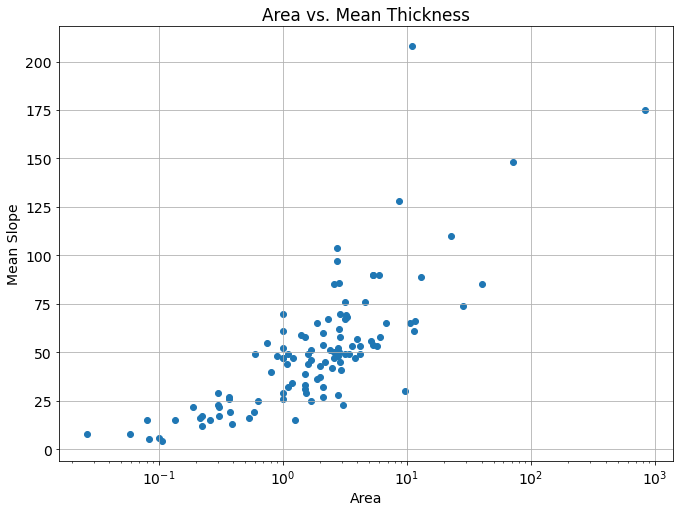

In [15]:
# Figure 2: area vs mean thickness
# solution
plt.figure(figsize=(11,8))
plt.scatter(new_geodata["AREA"], new_geodata["MEAN_THICKNESS"])
plt.xlabel('Area')
plt.ylabel('Mean Slope')
plt.title('Area vs. Mean Thickness')
plt.xscale('log')
plt.grid(True)

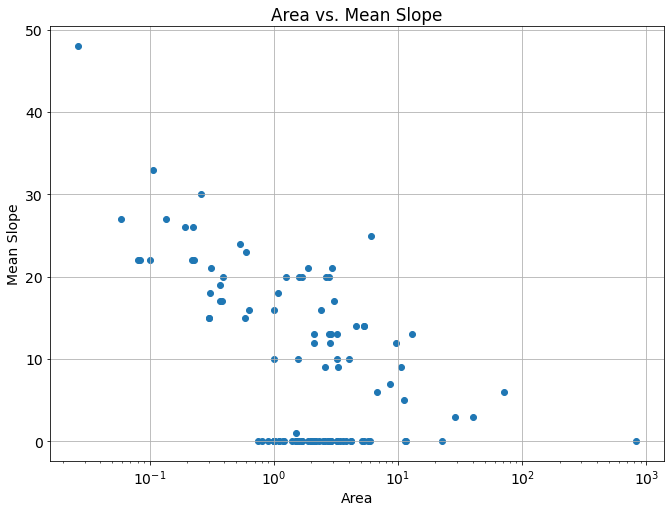

In [16]:
# Figure 2: area vs mean slope
# solution
plt.figure(figsize=(11,8))
plt.scatter(new_geodata["AREA"], new_geodata["MEAN_SLOPE"])
plt.xlabel('Area')
plt.ylabel('Mean Slope')
plt.title('Area vs. Mean Slope')
plt.xscale('log')
plt.grid(True)

### f) Linear Regression (5 points total counted in the next section)
You found from basic data visualization that the three parameters ``MEAN_SLOPE``, ``MEAN_THICKNESS``, and ``AREA`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

**1. Simple linear regression (1 point)**
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [17]:
# solution
# I wasn't sure if we needed to use the log for all three of the parameters but I did so
from sklearn.linear_model import LinearRegression

#Since we want to predict ice thickness from a crude estimate of the glacier area, I'm only calculating using area and thickness
thickness = np.log(np.asarray(new_geodata["MEAN_THICKNESS"]).reshape(-1,1))
area = np.log(np.asarray(new_geodata["AREA"]).reshape(-1,1))

reg = LinearRegression()

model = reg.fit(area,thickness)
# We will first predict the fit:
reg_pred = reg.predict(area) 

# The coefficient
reg.coef_[0][0]

0.3890224843292102

Make a plot of the data and the linear regression your just performed

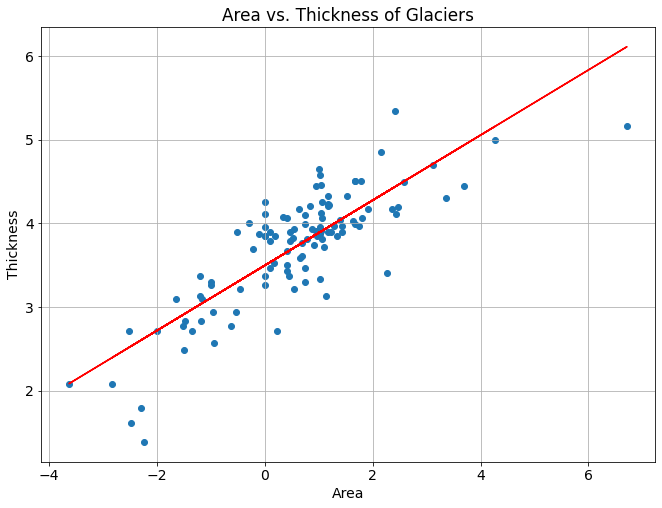

In [18]:
#solution
# I'm getting an error when trying to graph the np.log 
fig, ax = plt.subplots(figsize=(11,8))
plt.scatter(area,thickness)
ax.set_xlabel('Area')
ax.set_ylabel('Thickness')
ax.set_title('Area vs. Thickness of Glaciers')
ax.grid(True)
plt.plot(area,reg_pred,color="red")

Briefly comment on the quality of your fit and a linear regression (1 point)

I had an okay linear regression. The fit actually looks pretty good, and the R^2 value is about 0.68 

In [23]:
# I am doing a mean squarred error to dind the error and the R^2 value to see how good the fit is

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

error = mean_squared_error(thickness,reg_pred); print("Mean Squared Error:", error)
r2 = r2_score(thickness,reg_pred); print("R^2:", r2)

Mean Squared Error: 0.15521332492909515
R^2: 0.6820743899556532


**2. Leave One Out Cross Validation linear regression (1 point)**


Perform the LOCCV on the ``AREA`` and ``THICKNESS`` values. Predict the ``THICKNESS`` value knowing a ``AREA`` value. Use material seen in class. Make a plot of your fit.

In [32]:
from sklearn.model_selection import LeaveOneOut
# solution

# we randomly select values and split the data between training and validation set.
from sklearn.model_selection import ShuffleSplit
# we split once the data between a training and a validating set 
n=1 # we do this selectio once
v_size = 0.3 # 30% of the data will be randomly selected to be the validation set.

rs = ShuffleSplit(n_splits=n, test_size=.3, random_state=0)
for train_index, val_index in rs.split(thickness):
    thickness_train, thickness_val = thickness[train_index], thickness[val_index]
    area_train, area_val = area[train_index], area[val_index]

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

vel = np.zeros(len(thickness)) # initalize a vector to store the regression values
mse = np.zeros(len(thickness))
r2s = np.zeros(len(thickness))
i=0
for train, test in loo.split(thickness):    
    thickness_train, thickness_val = thickness[train_index], thickness[val_index]
    area_train, area_val = area[train_index], area[val_index]
    # now fit the data on the training set.
    regr = LinearRegression()
    regr_val = LinearRegression()
    # Fit on training data:
    regr.fit(area_train,thickness_train)
    # Fit on validation data:
    regr_val.fit(area_val,thickness_val)
    # We will first predict the fit:
    Epred=regr.predict(area) 
    Epred_val=regr_val.predict(area) 

    # The coefficients
    vel[i]= regr.coef_[0][0]
    mse[i]= mean_squared_error(Epred, Epred_val)
    r2s[i]=r2_score(Epred, Epred_val)
    i+=1

# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the slope estimates %f4.2 and the standard deviation %f4.2"%(np.mean(vel),np.std(vel)))
# the test error is the average of the mean-square-errors
print("CV = %f4.2"%(np.mean(mse)))

mean of the slope estimates 0.4148354.2 and the standard deviation 0.0000004.2
CV = 0.0308974.2


**3. Bootstrapping (1 point)**

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

mean of the velocity estimates 0.3938314.2 and the standard deviation 0.0370584.2


(array([ 4., 14., 13.,  9., 22., 14., 14.,  5.,  2.,  3.]),
 array([0.31891104, 0.33595067, 0.35299029, 0.37002992, 0.38706954,
        0.40410917, 0.4211488 , 0.43818842, 0.45522805, 0.47226767,
        0.4893073 ]),
 <BarContainer object of 10 artists>)

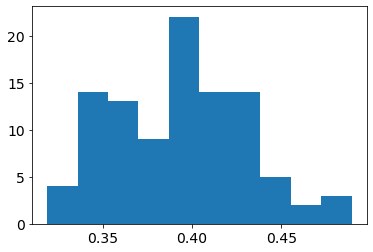

In [33]:
from sklearn.utils import resample
# solution

k=100
vel = np.zeros(k) # initalize a vector to store the regression values
mse = np.zeros(k)
r2s = np.zeros(k)
i=0
for iik in range(k):    
    ii = resample(np.arange(len(thickness)),replace=True,n_samples=len(thickness))# new indices
    thickness_b, area_b = thickness[ii], area[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    regr_val = LinearRegression()
    # Fit on training data:
    regr.fit(area_b,thickness_b)
    Epred=regr.predict(area) 

    # The coefficients
    vel[i]= regr.coef_[0][0]
    i+=1
    
# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the velocity estimates %f4.2 and the standard deviation %f4.2"%(np.mean(vel),np.std(vel)))
plt.hist(vel)

**4. Predict the thickness of a glacier (2 points)**

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

Text(0.5, 1.0, 'Distribution of Ice Thickness')

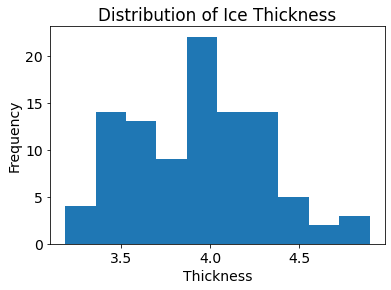

In [35]:
# solution

area_glacier = 10
prediction = area_glacier*vel
plt.hist(prediction)
plt.xlabel('Thickness')
plt.ylabel('Frequency')
plt.title('Distribution of Ice Thickness')

## 2) Spectrogram analysis of iceshelf vibrations (15 points total)

We will explore the spectral content of the vibrations felt on iceshelves. We first download seismic data, then filter it at different frequency bandwidths, then plot the spectrogram and comment on the data.

The seismic data is handled by the Obspy package. Review the obspy tutorial that Ariane.
We will download the data presented in: Aster, R.C., Lipovsky, B.P., Cole, H.M., Bromirski, P.D., Gerstoft, P., Nyblade, A., Wiens, D.A. and Stephen, R., 2021. Swell‐Triggered Seismicity at the Near‐Front Damage Zone of the Ross Ice Shelf. Seismological Research Letters. https://doi.org/10.1785/0220200478

__Tips__:
1. Check out the SciPy filtering help here: https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html. Obspy has built in functions as well, but for the sake of practicing, explore the scipy filtering functions.

2. The usual steps to handling seismic data are: data download (``get_waveforms``) & removing the instrumental response (``remove_response``).



**a. Import the relevant Obspy python modules (1 point).**

In [ ]:
#solution:
from obspy import 

In [ ]:
# Import the Obspy modules that will be useful to download seismic dat

**b. Data download (2 points)**

We will now download the data from station "DR01" from seismic network "XH", channel "LHN" from 1/1/2015 until 3/31/2015. The client will be the "IRIS" data center. Obspy functions take on UTCDateTime formatted obspy datetime object, be sure to call or import that specific function. (1 point)

In [ ]:
#solution


In [ ]:
# how many days did we download?
dt=Tend-Tstart # in seconds
Ndays = int(dt/86400) # in days

**c. Time series filtering (1 point)**

Now we will filter the trace to explore its frequency content. We will apply 3 filters:
1. a ``lowpass`` filter to look at seismic frequencies below 0.01Hz, or 100 s period

2. a ``bandpass`` filter to look at seismic frequencies between 0.01Hz-0.1 Hz (10-100s)

3. a ``highpass`` filter to look at seismic frequencies higher than 0.1 Hz (10s) and until the time series Nyquist frequency (0.5Hz since the data is sampled at 1 Hz).

In [ ]:
from scipy.signal import butter,buttord,  sosfiltfilt, freqs


# Here we use a Butterworth filter to select the spectral content of the waveform. 
# I like to use Buttord because it finds the order of the filter that meets the amplitude reduction criterion
# it's a lot more intuitive! https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html

N1, Wn1 = buttord(0.005, 0.001, 3, 40, True)
b1, a1 = butter(N1, Wn1, 'low', True)
N2, Wn2 = buttord([0.005, 0.1], [0.001, 0.2], 3, 40, True)
b2, a2 = butter(N2, Wn2, 'band', True)
N3, Wn3 = buttord(0.05, 0.1, 3, 40, True)
b3, a3 = butter(N3, Wn3, 'high', True)

w1, h1 = freqs(b1, a1, np.logspace(-3, 0, 500))
w2, h2 = freqs(b2, a2, np.logspace(-3, 0, 500))
w3, h3 = freqs(b3, a3, np.logspace(-3, 0, 500))
plt.semilogx(w1, 20 * np.log10(abs(h1)))
plt.semilogx(w2, 20 * np.log10(abs(h2)))
plt.semilogx(w3, 20 * np.log10(abs(h3)))
plt.legend(['low','bandpass','high'])
plt.axis([0.001, 1, -60, 3])
plt.grid(which='both', axis='both')


## It is recommended to use the second order sections when filtering to avoid transfer function errors.
sos1 = butter(N1, Wn1, 'low', output="sos")
sos2 = butter(N2, Wn2, 'band', output="sos")
sos3 = butter(N3, Wn3, 'high', output="sos")

# filter data
Z1 = sosfiltfilt(sos1, Z[0].data )
Z2 = sosfiltfilt(sos2, Z[0].data)
Z3 = sosfiltfilt(sos3, Z[0].data)


fig,ax=plt.subplots(3,1,figsize=(11,8))
t=np.linspace(0,Ndays,len(Z[0].data))
ax[0].plot(t,Z1);ax[0].set_title('DR01 - LHN -  0.001-0.01Hz');ax[0].grid(True)
ax[1].plot(t,Z2);ax[1].set_title('0.01-0.1Hz');ax[1].grid(True)
ax[2].plot(t,Z3);ax[2].set_title('0.1-1Hz');ax[2].grid(True)
plt.xlabel('Time (in days)')

**c. Fourier transform (3 points)**
Perform and the Fourier amplitude spectrum of the seismogram. Don't forget to label the figure properly! Use the Fourier frequency vector for x-axis. Use the tutorials for inspirtion.

In [1]:
# solution

Comment on the spectral content of the seismograms. How does the relative contribution of the low, intermediate, and high frequency signal compares with the relative amplitude observed in the bandpass filtered time series?

**d. Synthetic noise (3 points)**

We have now a good idea of what the amplitude of seismic waves are at this station. Now create a noise signal using the Fourier amplitude spectrum of the seismic signal, and with a random phase. You can use the notes from our first Numpy example (week3_lab1.ipynb)

In [ ]:
# solution


**e. !Sanity check! (1 point)**

Check that the Fourier amplitude spectrum of the noise is that of the original window. Overlay them on a plot 

In [2]:
#solution

NameError: name 'fft' is not defined

**f. Short Time Fourier Transform (4 points)**

STFT are important transforms that are used in data science of time series. They are mainly used for denoising and for feature extraction.
Spectrograms are STFT with window overlap.

In [3]:
from scipy.signal import stft

nperseg=1000

#solution


Now you have created a 2D image of a time series! Many seismologists use that as input to convolutional neural networks.



## 2) 2D Spectral analysis of geological models (10 points)

In this exercise we will correlate water table level with surface elevation. Please download the 3D Geologic framework
https://www.sciencebase.gov/catalog/item/5cfeb4cce4b0156ea5645056
and
https://www.sciencebase.gov/catalog/item/5e287112e4b0d3f93b03fa7f

In the following we will prepare our data.

In [ ]:
import netCDF4 as nc
file1 = '3DGeologicFrame/NCM_GeologicFrameworkGrids.nc' # mmake sure that the foler is called correctly.
file2 = '3DGeologicFrame/NCM_SpatialGrid.nc'
file3 = 'CalibrationCoef/NCM_AuxData.nc'
geology = nc.Dataset(file1)
grid = nc.Dataset(file2)
watertable = nc.Dataset(file3)

In [ ]:
print(grid)

In [ ]:
print(geology)

In [ ]:
print(watertable)

In [ ]:
x = grid['x'][0:4901, 0:3201]
y = grid['y'][0:4901, 0:3201]
y_ticks = grid['Index k grid'][0:4901, 0]
y_labels = grid['Latitude vector'][:]
# recreate the lat long vectors.
minlat,maxlat = min(grid['Latitude vector'][:]),max(grid['Latitude vector'][:])
minlon,maxlon = min(grid['Longitude vector'][:]),max(grid['Longitude vector'][:])
xlat = np.linspace(minlat,maxlat,3201)
xlon = np.linspace(minlon,maxlon,4901)

In [ ]:
geology['Surface Elevation'][3246, 1234]
elevation = geology['Surface Elevation'][0:4901, 0:3201]
bedrock = geology['Bedrock Elevation'][0:4901, 0:3201]
WT = watertable.variables['Water Table Depth'][0:4901, 0:3201]

**a. Plot (2 points)**
Plot the data ``WT`` and ``elevation``. Use ``contourf``,``x`` and ``y`` as lat-long variables. You can use ``levels``  to split the color map, and ``alpha`` less than 1 to increase transparency.

In [ ]:

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
ax.contourf(x, y, WT,cmap="RdBu_r",levels=[0,10,20,30,40,50,60,70,80,90,100,200],alpha=0.25)
ax.contour(x, y, elevation,cmap="Greys",linewidths=0.5)
ax.set_aspect('equal','box')
ax.set_xlim(-2.6E6,0);
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Western US water table depth')

**b. Perform and plot the 2D Fourier transforms (4 points)**

In [ ]:
from scipy.fftpack import fft2, fftfreq,fftshift
#solution

**c. Interpretation (1 point)**
Comment on the wavelengths that dominate the DEM and the water table wavelengths

**d. 2D filtering (3 points)**
Find a way to low pass filter the image (spectral filtering or convolution)